In [1]:
# imports
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.test.is_gpu_available()

True

In [3]:
# Model class
# class MNIST_classifier(tf.keras.Model):
#     def __init__(self, num_classes=10):
#         super(MNIST_classifier, self).__init__(name='mnit-class')
#         self.num_classes = num_classes
#         # defining model
#         self.flat = layers.Flatten(input_shape=(28,28))
#         self.dense_1 = layers.Dense(28*28, activation='relu')
#         #self.dense_hidden = [layers.Dense(16, activation = 'relu'), layers.Dense(16, activation = 'relu')]
#         self.dense_4 = layers.Dense(num_classes, activation = 'softmax')
        
#     def call(self, inputs):
#         x = self.flat(inputs)
#         x = self.dense_1(inputs)
#         #for layer in self.dense_hidden:
#             #x = layer(x)
#         return self.dense_4(x)
        
# model = MNIST_classifier(num_classes=10)

# model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
# importing data
# import tensorflow_datasets as tfds

# mnist_train = tfds.load(name='mnist', split='train', download=True, data_dir='./data')
# mnist_train = mnist_train.map(lambda x: {'image': x['image']/255, 'label': x['label']})
# mnist_test = tfds.load(name='mnist', split='test', download=True, data_dir='./data')
# mnist_test = mnist_test.map(lambda x: {'image': x['image']/255, 'label': x['label']})

(mnist_train_images, mnist_train_label), (mnist_test_images, mnist_test_label) = tf.keras.datasets.mnist.load_data()
mnist_train_images = mnist_train_images/255.0
mnist_test_images = mnist_test_images/255.0
print(mnist_train_images.shape)
print(mnist_train_label.shape)
# print(mnist_train_images[1])
mnist_train = tf.data.Dataset.from_tensor_slices((mnist_train_images, mnist_train_label))
mnist_test = tf.data.Dataset.from_tensor_slices((mnist_test_images, mnist_test_label))

(60000, 28, 28)
(60000,)


In [5]:
mnist_train_ = mnist_train.shuffle(1000).batch(32)
# prefetch will enable the input pipeline to asynchronously fetch batches while
# your model is training.
mnist_train__ = mnist_train_.prefetch(tf.data.experimental.AUTOTUNE)
# print(type(mnist_train))

model.fit(mnist_train_, epochs=3)
# model.fit(mnist_train_images, mnist_train_label, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2567 - accuracy: 0.9255
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1134 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9775


In [11]:
print(mnist_train)
mnist_train_1 = mnist_train.shuffle(1000)
print(mnist_train_1)
mnist_train_2 = mnist_train_1.batch(32)
print(mnist_train_2)

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>
<ShuffleDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>
<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.uint8)>


In [7]:
print(mnist_train__)
test_loss, test_acc = model.evaluate(mnist_test_images, mnist_test_label, verbose=2)

print('\nTest accuracy:', test_acc)

<PrefetchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.uint8)>
10000/1 - 1s - loss: 0.0502 - accuracy: 0.9686

Test accuracy: 0.9686


In [6]:
model.fit(mnist_train_images, mnist_train_label, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0595 - accuracy: 0.9816
Epoch 2/3
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0444 - accuracy: 0.9863
Epoch 3/3
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0356 - accuracy: 0.9889


In [8]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(predictions_array),
                                str(true_label)),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

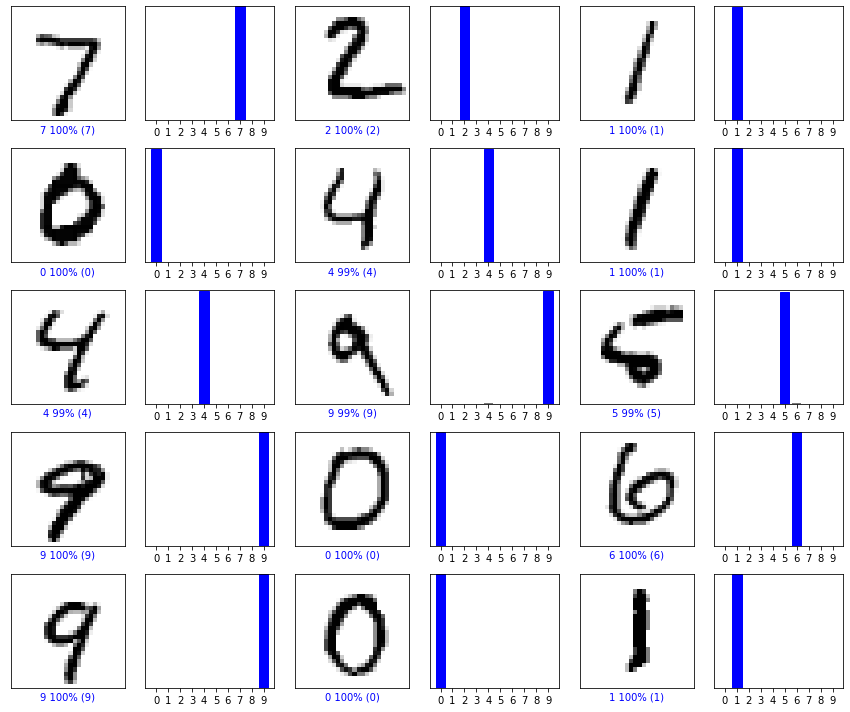

In [9]:
predictions = model.predict(mnist_test_images)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], mnist_test_label, mnist_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], mnist_test_label)
plt.tight_layout()
plt.show()